
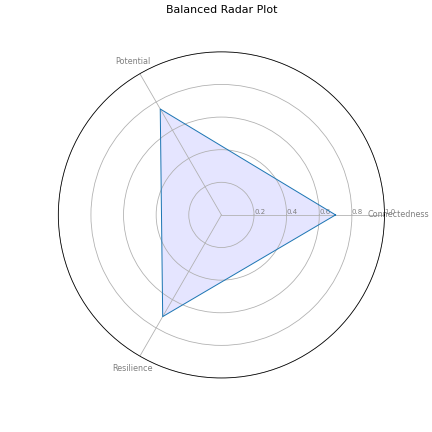


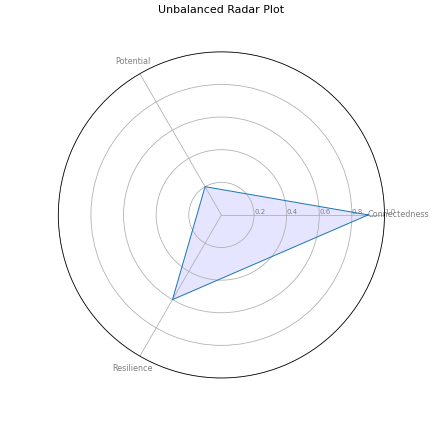

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
import base64
from IPython.display import display, HTML

def create_radar_plot_image(connectedness, potential, resilience, title="Radar Plot"):
    """
    Creates a radar plot and returns it as a base64 encoded image.
    """
    categories = ['Connectedness', 'Potential', 'Resilience']
    values = [connectedness, potential, resilience]

    num_vars = len(categories)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]

    fig, ax = plt.subplots(1, 1, subplot_kw=dict(polar=True), figsize=(6, 6))

    plt.xticks(angles[:-1], categories, color='grey', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=7)
    plt.ylim(0, 1)

    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)

    plt.title(title, size=11, color='black', y=1.1)

    img = BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)
    plt.close(fig)

    img_base64 = base64.b64encode(img.getvalue()).decode('utf-8')
    return img_base64

def display_radar_plot(connectedness, potential, resilience, title="Radar Plot"):
    """
    Displays the radar plot as an inline image.
    """
    img_base64 = create_radar_plot_image(connectedness, potential, resilience, title)
    display(HTML(f'<img src="data:image/png;base64,{img_base64}" alt="{title}">'))

# Example usage for a balanced plot (values approximately equal):
display_radar_plot(0.7, 0.75, 0.72, title="Balanced Radar Plot")

#Example usage for an unbalanced plot.
display_radar_plot(0.9, 0.2, 0.6, title="Unbalanced Radar Plot")